## HPP - MVP

## Setup

In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder

# read in all our data
train_df = pd.read_csv("train.csv")
# set seed for reproducibility
np.random.seed(0)

#Delete ID column
train_df.drop(['Id'], axis=1, inplace=True)

## Filling missing values in the train data

In [92]:
#Get the number of missing data points per column
missing_values_count = train_df.isnull().sum()
#Get columns with at least one missing data point
columns_with_missing_data = missing_values_count[missing_values_count > 0]

In [93]:
# Numeric
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

# Categorical
train_df['Alley'] = train_df['Alley'].fillna(train_df['Alley'].mode()[0])
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['PoolQC'] = train_df['PoolQC'].fillna(train_df['PoolQC'].mode()[0])
train_df['Fence'] = train_df['Fence'].fillna(train_df['Fence'].mode()[0])
train_df['MiscFeature'] = train_df['MiscFeature'].fillna(train_df['MiscFeature'].mode()[0])


# Check that we have no NA values.
missing_values_count = train_df.isnull().sum()
columns_with_missing_data = missing_values_count[missing_values_count > 0]
print(columns_with_missing_data)

Series([], dtype: int64)


## Concatenation with Test data

In [94]:
test_df = pd.read_csv('processed_test_df')
train_test_df = pd.concat([train_df,test_df],axis=0)

## Encoding

In [95]:
# Identify categorical columns
categorical_columns = train_test_df.select_dtypes(include=['object']).columns

# Preprocess the data to ensure categorical columns contain only strings
train_test_df[categorical_columns] = train_test_df[categorical_columns].astype(str)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')

# Fit and transform the categorical data using one-hot encoding
X_encoded = encoder.fit_transform(train_test_df[categorical_columns])

# Get the feature names
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the one-hot encoded features
X_encoded_train_test_df = pd.DataFrame(X_encoded, columns=feature_names)

# Reset the index of both DataFrames
X_encoded_train_test_df.reset_index(drop=True, inplace=True)
train_test_df.reset_index(drop=True, inplace=True)

# Combine the one-hot encoded features with the original numerical features
train_test_df = pd.concat([X_encoded_train_test_df, train_test_df.drop(categorical_columns, axis=1)], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Split

In [96]:
HPP_data_Train = train_test_df.iloc[:1460,:]
HPP_data_Test = train_test_df.iloc[1460:,:]
HPP_data_Test.drop(['SalePrice'],axis=1,inplace=True)

/var/folders/vk/b9g86spn6n9d9mny96n4mww80000gn/T/ipykernel_23256/3667416484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPP_data_Test.drop(['SalePrice'],axis=1,inplace=True)


# Linear Regression 

Root Mean Squared Error: 51294.93568561074


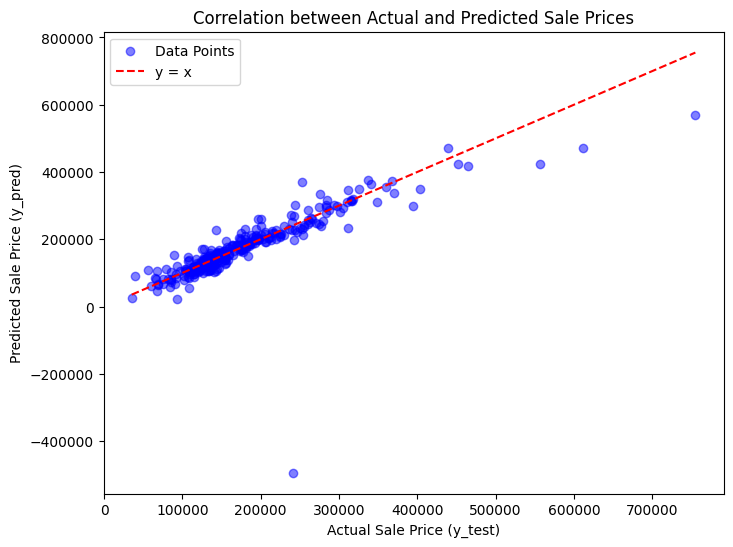

In [103]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# X_train should contain your features, and y_train should contain the target variable (SalePrice).
X_train= HPP_data_Train.drop(['SalePrice'],axis=1)
y_train= HPP_data_Train['SalePrice']

# Initialize the Linear Regression model
liner_regression_model = LinearRegression()
# Fit the liner_regression_model to your training data
liner_regression_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = liner_regression_model.predict(HPP_data_Test)


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the liner_regression_model to the training data
liner_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = liner_regression_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the liner_regression_model's performance
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE
import math
rmse = math.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error:", rmse)



# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Sale Price (y_test)")
plt.ylabel("Predicted Sale Price (y_pred)")
plt.title("Correlation between Actual and Predicted Sale Prices")
plt.legend()
plt.show()

# Random Forest

Root Mean Squared Error: 27453.61561750725


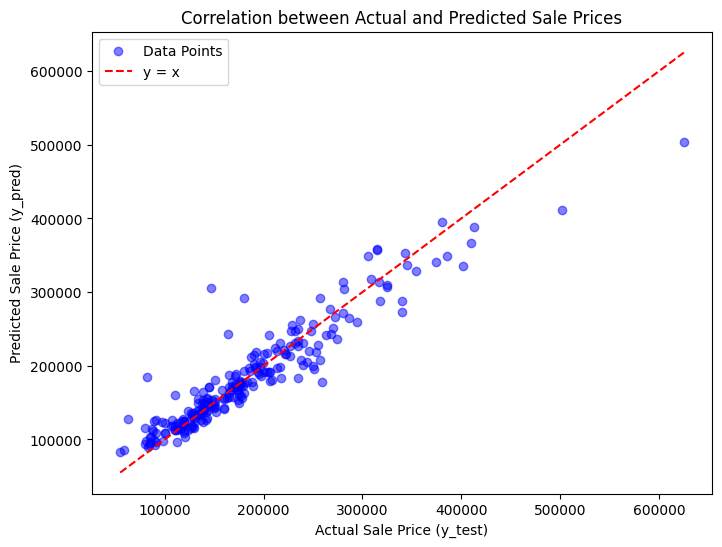

In [104]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# X_train should contain your features, and y_train should contain the target variable (SalePrice).
X_train = HPP_data_Train.drop(['SalePrice'], axis=1)
y_train = HPP_data_Train['SalePrice']

# Initialize the RandomForestRegressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
# Fit the random_forest_regressor to your training data
random_forest_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = random_forest_regressor.predict(HPP_data_Test)




# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model to the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_regressor.predict(X_test)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the random_forest_regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE
import math
rmse = math.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error:", rmse)




# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Sale Price (y_test)")
plt.ylabel("Predicted Sale Price (y_pred)")
plt.title("Correlation between Actual and Predicted Sale Prices")
plt.legend()
plt.show()

# Gradient Boosting regression

Root Mean Squared Error: 25531.707236215792


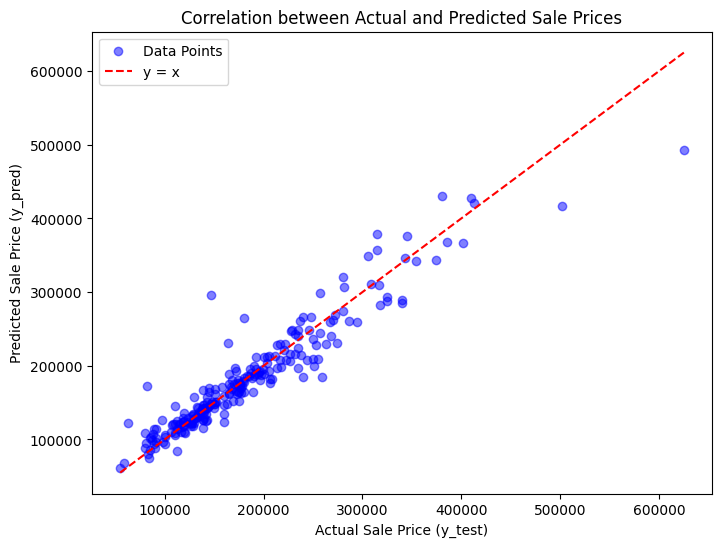

In [107]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# X_train should contain your features, and y_train should contain the target variable (SalePrice).
X_train = HPP_data_Train.drop(['SalePrice'], axis=1)
y_train = HPP_data_Train['SalePrice']

# Initialize the GradientBoostingRegressor model
gradiant_boosting_regressor_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fit the gradiant_boosting_regressor_model to your training data
gradiant_boosting_regressor_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = gradiant_boosting_regressor_model.predict(HPP_data_Test)




# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the gradiant_boosting_regressor_model  to the training data
gradiant_boosting_regressor_model .fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradiant_boosting_regressor_model .predict(X_test)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the gradiant_boosting_regressor_model  to the training data
gradiant_boosting_regressor_model .fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradiant_boosting_regressor_model .predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the gradiant_boosting_regressor_model 's performance
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE
import math
rmse = math.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error:", rmse)




# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Sale Price (y_test)")
plt.ylabel("Predicted Sale Price (y_pred)")
plt.title("Correlation between Actual and Predicted Sale Prices")
plt.legend()
plt.show()

# XGBoost

Root Mean Squared Error: 26923.26945852606


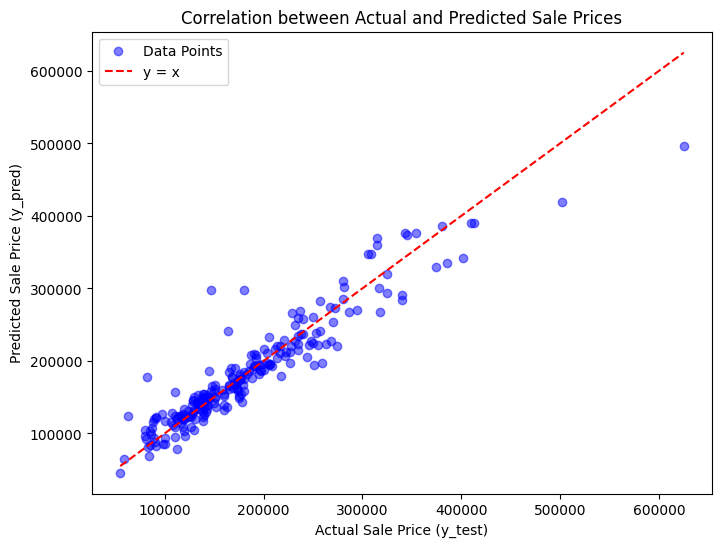

In [106]:
# Import the necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# X_train should contain your features, and y_train should contain the target variable (SalePrice).
X_train = HPP_data_Train.drop(['SalePrice'], axis=1)
y_train = HPP_data_Train['SalePrice']

# Initialize the XGBoost Regressor model
xg_boost_regressor = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
# Fit the xg_boost_regressor to your training data
xg_boost_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = xg_boost_regressor.predict(HPP_data_Test)





# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model to the training data
xg_boost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xg_boost_regressor.predict(X_test)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the xg_boost_regressor to the training data
xg_boost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xg_boost_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the xg_boost_regressor's performance
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE
import math
rmse = math.sqrt(mse)

# Print the RMSE
print("Root Mean Squared Error:", rmse)





# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel("Actual Sale Price (y_test)")
plt.ylabel("Predicted Sale Price (y_pred)")
plt.title("Correlation between Actual and Predicted Sale Prices")
plt.legend()
plt.show()

# Submission

In [102]:
pred=pd.DataFrame(y_pred)
# Create a DataFrame with 'Id' values (1461 to N+1460) and the 'SalePrice' values from 'pred'
pred['Id'] = range(1461, 1461 + len(pred))
pred = pred.rename(columns={0: 'SalePrice'})
# Create a new DataFrame with columns named "Id" and "SalePrice"
result_df = pred[['Id', 'SalePrice']]
# Save the DataFrame to a CSV file
result_df.to_csv('predicted_saleprice.csv', index=False)